In [ ]:
import pandas as pd


#Read the dataset from local drive
influencer_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_sourcecode\\Influencer_list.csv", low_memory=False, keep_date_col=True, nrows=100000)
influencer_df

In [ ]:
username_dict = influencer_df["username"].tolist()
follow_by_dict = influencer_df["total_follow_by"].tolist()
followby_count = influencer_df["count"].tolist()
iteration = influencer_df["iteration"].tolist()


combined_dict = {}
for key in username_dict:
    combined_dict[key] = []
    for value in follow_by_dict:
        combined_dict[key].append(value)
        follow_by_dict.remove(value)
        break
        
    for value1 in followby_count:
        combined_dict[key].append(value1)
        followby_count.remove(value1)
        break
        
    for value2 in iteration:
        combined_dict[key].append(value2)
        iteration.remove(value2)
        break
        

In [ ]:
import networkx as nx

G_asymmetric = nx.DiGraph()
count = 0
for key, values in combined_dict.items():
    for value in values[:-2]:
        followby_list = value.split(",")
        
        for follower in followby_list:
            G_asymmetric.add_edge(follower,key)
    

In [ ]:
print(G_asymmetric._node)

In [ ]:
import matplotlib.pyplot as plt

nx.spring_layout(G_asymmetric)
#nx.draw_networkx(G_asymmetric)

nx.draw(G_asymmetric, with_labels=True)
plt.figure(figsize=(1000, 1000))
plt.show()

In [ ]:
print(nx.info(G_asymmetric))

In [ ]:
nx.degree_centrality(G_asymmetric)

In [ ]:
nx.eigenvector_centrality(G_asymmetric)

In [ ]:
nx.closeness_centrality(G_asymmetric)

In [ ]:
nx.pagerank(G_asymmetric, alpha=0.85)

In [ ]:
pip install --upgrade scipy networkx

# Sentiment Analysis

In [56]:
import pandas as pd
from nltk.corpus import stopwords
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy

stop = stopwords.words('english')
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

#Read the dataset from local drive
tweet_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\tweet_filter\\full_tweet_list.csv", low_memory=False, keep_date_col=True, nrows=150000)

C:\ProgramData\Anaconda3\lib\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [58]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "»","\n"]

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

In [59]:
for char in spec_chars:
    tweet_df['tweet'] = tweet_df['tweet'].str.replace(char, ' ')
    
tweet_df['tweet'] = tweet_df['tweet'].str.split().str.join(" ")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("[^a-zA-Z#]", " ")
tweet_df['tweet'] = tweet_df['tweet'].str.casefold()
tweet_df['tweet'] = tweet_df['tweet'].str.replace("bitcoin", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("btc", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("crypto", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("ethereum", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace(" eth ", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace(" u ", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("binance", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("bnb", "")
tweet_df = tweet_df.dropna(subset=['tweet'])
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: remove_emoji(x))
tweet_df['tweet']= tweet_df['tweet'].apply(space)

C:\Users\Alex\AppData\Local\Temp\ipykernel_13596\910383922.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tweet_df['tweet'] = tweet_df['tweet'].str.replace(char, ' ')
C:\Users\Alex\AppData\Local\Temp\ipykernel_13596\910383922.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['tweet'] = tweet_df['tweet'].str.replace("[^a-zA-Z#]", " ")


In [60]:
tweet_df

,id,conversation_id,created_at,date,time,username,tweet,replies_count,retweets_count,likes_count,tag
0,1.580840e+18,1580839969836318720,2022-10-14 16:36:34 Malay Peninsula Standard Time,2022-10-14,16:36:34,cz_binance,conversation today know drop k k yes,53,2129,13217,['bitcoin'
1,1.579859e+18,1579858577271185408,2022-10-11 23:36:51 Malay Peninsula Standard Time,2022-10-11,23:36:51,cz_binance,world large company accept,57,2930,14782,[]
2,1.579849e+18,1579848963473436673,2022-10-11 22:58:39 Malay Peninsula Standard Time,2022-10-11,22:58:39,cz_binance,google accept,80,6052,31635,[]
3,1.578985e+18,1578984871875448832,2022-10-09 13:45:04 Malay Peninsula Standard Time,2022-10-09,13:45:04,cz_binance,train law enforcement stop crime,26,569,3049,[]
4,1.578014e+18,1578014449746599937,2022-10-06 21:28:57 Malay Peninsula Standard Time,2022-10-06,21:28:57,cz_binance,slowly surely namibia central bank say accepte...,940,1855,7892,[]
...,...,...,...,...,...,...,...,...,...,...,...
141124,1.217918e+18,1217828065755009026,2020-01-17 05:15:46 Malay Peninsula Standard Time,2020-01-17,05:15:46,haydenzadams,yeah tell ren goal mint wrap token work w exis...,3,1,13,[]
141125,1.217500e+18,1217498738979229707,2020-01-16 01:35:07 Malay Peninsula Standard Time,2020-01-16,01:35:07,haydenzadams,uniswap v launch likely deploy general purpose...,0,0,9,[]
141126,1.217481e+18,1217475999576875014,2020-01-16 00:17:29 Malay Peninsula Standard Time,2020-01-16,00:17:29,haydenzadams,agree ethtotokenswapinput ethtotokenswapoutput...,0,0,1,[]
141127,1.213132e+18,1213130204656349184,2020-01-04 00:14:34 Malay Peninsula Standard Time,2020-01-04,00:14:34,haydenzadams,decentralization remove central point failure ...,2,0,23,[]


In [129]:
tweet_df.to_csv('filtered_tweet.csv')

# Vader Lexicon

In [4]:
from nltk.tag import pos_tag
import pandas as pd
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

filtered_tweet_df = pd.read_csv("C:\\Users\\Alex\\filtered_tweet.csv", low_memory=False, keep_date_col=True, nrows=999999)
filtered_tweet_df.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,username,tweet,replies_count,retweets_count,likes_count,tag
0,0,1.580840e+18,1580839969836318720,2022-10-14 16:36:34 Malay Peninsula Standard Time,2022-10-14,16:36:34,cz_binance,conversation today know drop k k yes,53,2129,13217,['bitcoin'
1,1,1.579859e+18,1579858577271185408,2022-10-11 23:36:51 Malay Peninsula Standard Time,2022-10-11,23:36:51,cz_binance,world large company accept,57,2930,14782,[]
2,2,1.579849e+18,1579848963473436673,2022-10-11 22:58:39 Malay Peninsula Standard Time,2022-10-11,22:58:39,cz_binance,google accept,80,6052,31635,[]
3,3,1.578985e+18,1578984871875448832,2022-10-09 13:45:04 Malay Peninsula Standard Time,2022-10-09,13:45:04,cz_binance,train law enforcement stop crime,26,569,3049,[]
4,4,1.578014e+18,1578014449746599937,2022-10-06 21:28:57 Malay Peninsula Standard Time,2022-10-06,21:28:57,cz_binance,slowly surely namibia central bank say accepte...,940,1855,7892,[]


In [8]:
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [10]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in filtered_tweet_df.iterrows():
    scores = sid.polarity_scores(str(row[7]))
    for key, value in scores.items():
        temp = [key,value,row[2]]
        df1['row_id']= str(row[2])
        df1['tweet']=str(row[7])
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=pd.concat([t_df, df1])
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
                row_id sentiment_type  sentiment_score  \
0  1580839969836318720       compound           0.1531   
0  1579858577271185408       compound           0.3818   
0  1579848963473436673       compound           0.3818   
0  1578984871875448832       compound          -0.6908   
0  1578014449746599937       compound           0.6124   
0  1577919847228399617       compound          -0.1027   
0  1577707303205216257       compound           0.4019   
0  1576883108997058560       compound           0.0000   
0  1575743748394299393       compound           0.3818   
0  1575483013684924416       compound           0.0000   

                                               tweet  
0               conversation today know drop k k yes  
0                         world large company accept  
0                                      google accept  
0                   train law enforcement stop crime  
0  slowly surely namibia central bank say accepte... 

# Sentiment Word Net

In [16]:
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [17]:
list(swn.senti_synsets('slow'))

[SentiSynset('decelerate.v.01'),
 SentiSynset('slow.v.02'),
 SentiSynset('slow.v.03'),
 SentiSynset('slow.a.01'),
 SentiSynset('slow.a.02'),
 SentiSynset('dense.s.04'),
 SentiSynset('slow.a.04'),
 SentiSynset('boring.s.01'),
 SentiSynset('dull.s.08'),
 SentiSynset('slowly.r.01'),
 SentiSynset('behind.r.03')]

In [18]:
from nltk.tag import pos_tag
import pandas as pd

filtered_tweet_df = pd.read_csv("C:\\Users\\Alex\\filtered_tweet.csv", low_memory=False, keep_date_col=True, nrows=999999)

In [19]:
filtered_tweet_df.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,username,tweet,replies_count,retweets_count,likes_count,tag
0,0,1.580840e+18,1580839969836318720,2022-10-14 16:36:34 Malay Peninsula Standard Time,2022-10-14,16:36:34,cz_binance,conversation today know drop k k yes,53,2129,13217,['bitcoin'
1,1,1.579859e+18,1579858577271185408,2022-10-11 23:36:51 Malay Peninsula Standard Time,2022-10-11,23:36:51,cz_binance,world large company accept,57,2930,14782,[]
2,2,1.579849e+18,1579848963473436673,2022-10-11 22:58:39 Malay Peninsula Standard Time,2022-10-11,22:58:39,cz_binance,google accept,80,6052,31635,[]
3,3,1.578985e+18,1578984871875448832,2022-10-09 13:45:04 Malay Peninsula Standard Time,2022-10-09,13:45:04,cz_binance,train law enforcement stop crime,26,569,3049,[]
4,4,1.578014e+18,1578014449746599937,2022-10-06 21:28:57 Malay Peninsula Standard Time,2022-10-06,21:28:57,cz_binance,slowly surely namibia central bank say accepte...,940,1855,7892,[]


In [20]:
from nltk.stem import WordNetLemmatizer

def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def cal_wordNetSentimentScore(after_tagging):
    sentiment = 0.0
    tokens_count = 0
    lemmatizer = WordNetLemmatizer()

    for word, tag in after_tagging:
        wn_tag = penn_to_wn(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            continue

        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        if not lemma:
            continue

        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())

        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
    return (sentiment)  

In [21]:
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_score']=0

In [22]:
sentiment = 0.0
tokens_count = 0
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
t_df = df1
for index, row in filtered_tweet_df.iterrows():
    token = nltk.word_tokenize(str(row[7]))
    after_tagging = nltk.pos_tag(token)
    sentiment_score = cal_wordNetSentimentScore(after_tagging)
    df1['row_id']= str(row[2])
    df1['tweet']=str(row[7])
    df1['sentiment_score']=sentiment_score
    t_df=pd.concat([t_df, df1])

t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()

print(t_df_cleaned.head(10))

                row_id  sentiment_score  \
0  1580839969836318720            0.500   
0  1579858577271185408            0.125   
0  1579848963473436673            0.000   
0  1578984871875448832            0.000   
0  1578014449746599937            0.250   
0  1577919847228399617            0.000   
0  1577707303205216257            0.000   
0  1576883108997058560            0.000   
0  1575743748394299393            0.125   
0  1575483013684924416            0.000   

                                               tweet  
0               conversation today know drop k k yes  
0                         world large company accept  
0                                      google accept  
0                   train law enforcement stop crime  
0  slowly surely namibia central bank say accepte...  
0                                           send pay  
0                              much many people help  
0                                           everyone  
0         spain large telecom c

# TextBlob

In [28]:
df1=pd.DataFrame()
df1['row_id']=['99999999999']

In [29]:
from textblob import TextBlob

t_df = df1
for index, row in filtered_tweet_df.iterrows():
    sentence = TextBlob(str(row[7]))
    df1['row_id']= str(row[2])
    df1['tweet']=str(row[7])
    df1['subjectivity_score']= sentence.sentiment.subjectivity
    df1['polarity_score']= sentence.sentiment.polarity
    t_df=pd.concat([t_df, df1])

t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()

print(t_df_cleaned.head(10))

                row_id                                              tweet  \
0  1580839969836318720               conversation today know drop k k yes   
0  1579858577271185408                         world large company accept   
0  1579848963473436673                                      google accept   
0  1578984871875448832                   train law enforcement stop crime   
0  1578014449746599937  slowly surely namibia central bank say accepte...   
0  1577919847228399617                                           send pay   
0  1577707303205216257                              much many people help   
0  1576883108997058560                                           everyone   
0  1575743748394299393         spain large telecom company accept payment   
0  1575483013684924416                                  tone start change   

   subjectivity_score  polarity_score  
0            0.000000        0.000000  
0            0.428571        0.214286  
0            0.000000        0.0

# Collect Sentiment

In [30]:
t_df_sentiment = t_df_cleaned.rename({'row_id': 'conversation_id'}, axis=1)
t_df_sentiment.head()
#t_df_cleaned["row_id"] = pd.to_numeric(t_df_cleaned["row_id"])

,conversation_id,tweet,subjectivity_score,polarity_score
0,1580839969836318720,conversation today know drop k k yes,0.000000,0.000000
0,1579858577271185408,world large company accept,0.428571,0.214286
0,1579848963473436673,google accept,0.000000,0.000000
0,1578984871875448832,train law enforcement stop crime,0.000000,0.000000
0,1578014449746599937,slowly surely namibia central bank say accepte...,0.569444,0.250000


In [31]:
filtered_tweet_df.head(5)
#filtered_tweet_df["conversation_id"] = pd.to_numeric(filtered_tweet_df["conversation_id"])

,Unnamed: 0,id,conversation_id,created_at,date,time,username,tweet,replies_count,retweets_count,likes_count,tag
0,0,1.580840e+18,1580839969836318720,2022-10-14 16:36:34 Malay Peninsula Standard Time,2022-10-14,16:36:34,cz_binance,conversation today know drop k k yes,53,2129,13217,['bitcoin'
1,1,1.579859e+18,1579858577271185408,2022-10-11 23:36:51 Malay Peninsula Standard Time,2022-10-11,23:36:51,cz_binance,world large company accept,57,2930,14782,[]
2,2,1.579849e+18,1579848963473436673,2022-10-11 22:58:39 Malay Peninsula Standard Time,2022-10-11,22:58:39,cz_binance,google accept,80,6052,31635,[]
3,3,1.578985e+18,1578984871875448832,2022-10-09 13:45:04 Malay Peninsula Standard Time,2022-10-09,13:45:04,cz_binance,train law enforcement stop crime,26,569,3049,[]
4,4,1.578014e+18,1578014449746599937,2022-10-06 21:28:57 Malay Peninsula Standard Time,2022-10-06,21:28:57,cz_binance,slowly surely namibia central bank say accepte...,940,1855,7892,[]


In [32]:
filtered_tweet_df['tweet'] = filtered_tweet_df['tweet'].astype(str)
t_df_sentiment['tweet'] = t_df_sentiment['tweet'].astype(str)

filtered_tweet_df['conversation_id'] = filtered_tweet_df['conversation_id'].astype(str)
t_df_sentiment['conversation_id'] = t_df_sentiment['conversation_id'].astype(str)

final_tweet_df = filtered_tweet_df.merge(t_df_sentiment, on=['conversation_id', 'tweet'])

In [33]:
final_tweet_df['conversation_id'] = final_tweet_df['conversation_id'].map(str) + "\t"
final_tweet_df = final_tweet_df.drop_duplicates()
final_tweet_df.head(5)

,Unnamed: 0,id,conversation_id,created_at,date,time,username,tweet,replies_count,retweets_count,likes_count,tag,subjectivity_score,polarity_score
0,0,1.580840e+18,1580839969836318720\t,2022-10-14 16:36:34 Malay Peninsula Standard Time,2022-10-14,16:36:34,cz_binance,conversation today know drop k k yes,53,2129,13217,['bitcoin',0.000000,0.000000
1,1,1.579859e+18,1579858577271185408\t,2022-10-11 23:36:51 Malay Peninsula Standard Time,2022-10-11,23:36:51,cz_binance,world large company accept,57,2930,14782,[],0.428571,0.214286
2,2,1.579849e+18,1579848963473436673\t,2022-10-11 22:58:39 Malay Peninsula Standard Time,2022-10-11,22:58:39,cz_binance,google accept,80,6052,31635,[],0.000000,0.000000
3,3,1.578985e+18,1578984871875448832\t,2022-10-09 13:45:04 Malay Peninsula Standard Time,2022-10-09,13:45:04,cz_binance,train law enforcement stop crime,26,569,3049,[],0.000000,0.000000
4,4,1.578014e+18,1578014449746599937\t,2022-10-06 21:28:57 Malay Peninsula Standard Time,2022-10-06,21:28:57,cz_binance,slowly surely namibia central bank say accepte...,940,1855,7892,[],0.569444,0.250000


In [34]:
final_tweet_df.to_csv('sentiment_textBlob.csv')

# Experiment

In [35]:
import pandas as pd

vader_tweet_df = pd.read_csv("C:\\Users\\Alex\\sentiment_Vader.csv", low_memory=False, keep_date_col=True, nrows=999999)

In [36]:
vader_tweet_df.head()

,Unnamed: 0.1,Unnamed: 0,id,conversation_id,created_at,date,time,username,tweet,replies_count,retweets_count,likes_count,tag,sentiment_type,sentiment_score
0,0,0,1.580840e+18,1580839969836318720,2022-10-14 16:36:34 Malay Peninsula Standard Time,2022-10-14,16:36:34,cz_binance,conversation today know drop k k yes,53,2129,13217,['bitcoin',compound,0.1531
1,1,1,1.579859e+18,1579858577271185408,2022-10-11 23:36:51 Malay Peninsula Standard Time,2022-10-11,23:36:51,cz_binance,world large company accept,57,2930,14782,[],compound,0.3818
2,2,2,1.579849e+18,1579848963473436673,2022-10-11 22:58:39 Malay Peninsula Standard Time,2022-10-11,22:58:39,cz_binance,google accept,80,6052,31635,[],compound,0.3818
3,3,3,1.578985e+18,1578984871875448832,2022-10-09 13:45:04 Malay Peninsula Standard Time,2022-10-09,13:45:04,cz_binance,train law enforcement stop crime,26,569,3049,[],compound,-0.6908
4,4,4,1.578014e+18,1578014449746599937,2022-10-06 21:28:57 Malay Peninsula Standard Time,2022-10-06,21:28:57,cz_binance,slowly surely namibia central bank say accepte...,940,1855,7892,[],compound,0.6124


In [48]:
textBlob_tweet_df = pd.read_csv("C:\\Users\\Alex\\sentiment_TextBlob.csv", low_memory=False, keep_date_col=True, nrows=999999)

In [49]:
textBlob_tweet_df.head()

,Unnamed: 0.1,Unnamed: 0,id,conversation_id,created_at,date,time,username,tweet,replies_count,retweets_count,likes_count,tag,subjectivity_score,polarity_score
0,0,0,1.580840e+18,1580839969836318720,2022-10-14 16:36:34 Malay Peninsula Standard Time,2022-10-14,16:36:34,cz_binance,conversation today know drop k k yes,53,2129,13217,['bitcoin',0.000000,0.000000
1,1,1,1.579859e+18,1579858577271185408,2022-10-11 23:36:51 Malay Peninsula Standard Time,2022-10-11,23:36:51,cz_binance,world large company accept,57,2930,14782,[],0.428571,0.214286
2,2,2,1.579849e+18,1579848963473436673,2022-10-11 22:58:39 Malay Peninsula Standard Time,2022-10-11,22:58:39,cz_binance,google accept,80,6052,31635,[],0.000000,0.000000
3,3,3,1.578985e+18,1578984871875448832,2022-10-09 13:45:04 Malay Peninsula Standard Time,2022-10-09,13:45:04,cz_binance,train law enforcement stop crime,26,569,3049,[],0.000000,0.000000
4,4,4,1.578014e+18,1578014449746599937,2022-10-06 21:28:57 Malay Peninsula Standard Time,2022-10-06,21:28:57,cz_binance,slowly surely namibia central bank say accepte...,940,1855,7892,[],0.569444,0.250000


In [38]:
VaderSentiment_tweet_df =vader_tweet_df.drop(['id','Unnamed: 0.1','Unnamed: 0','conversation_id','created_at','time','tweet','replies_count','retweets_count','likes_count','tag','sentiment_type'], axis=1)

In [40]:
VaderSentiment_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141125 entries, 0 to 141124
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             141125 non-null  object 
 1   username         141125 non-null  object 
 2   sentiment_score  141125 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.2+ MB


In [41]:
VaderSentiment_tweet_df['date'] = pd.to_datetime(VaderSentiment_tweet_df['date'])

In [75]:
VaderSentiment_tweet_df.head(30)

,date,username,sentiment_score
0,2022-10-14,cz_binance,0.1531
1,2022-10-11,cz_binance,0.3818
2,2022-10-11,cz_binance,0.3818
3,2022-10-09,cz_binance,-0.6908
4,2022-10-06,cz_binance,0.6124
5,2022-10-06,cz_binance,-0.1027
6,2022-10-06,cz_binance,0.4019
8,2022-09-30,cz_binance,0.3818
11,2022-09-27,cz_binance,0.0772
12,2022-09-26,cz_binance,0.1531


In [74]:
#VaderSentiment_tweet_df =VaderSentiment_tweet_df[VaderSentiment_tweet_df['sentiment_score'] !=0]

In [80]:
#vs_df = VaderSentiment_tweet_df.groupby(['date','username'])['sentiment_score'].mean()
#vs_df = VaderSentiment_tweet_df.groupby(['date'])['sentiment_score'].sum()

In [81]:
vs_df

date
2020-01-01     6.6775
2020-01-02    13.2738
2020-01-03     9.4258
2020-01-04    20.7076
2020-01-05     5.6203
               ...   
2022-10-12    23.7522
2022-10-13    18.4630
2022-10-14    19.1970
2022-10-15    11.5813
2022-10-16     8.5655
Name: sentiment_score, Length: 1020, dtype: float64

In [83]:
VaderSentiment_tweet_df.to_csv('vs_df.csv')

In [1]:
import json
import pandas as pd
import io
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook, tqdm
import glob
from datetime import datetime, timedelta

In [21]:
btc_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\BTC-USD.csv", low_memory=False, keep_date_col=True, nrows=100000)
eth_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\ETH-USD.csv", low_memory=False, keep_date_col=True, nrows=100000)

In [22]:
btc_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...,...
1029,2022-10-26,20092.236328,20938.134766,20076.117188,20770.441406,20770.441406,58895950537
1030,2022-10-27,20772.802734,20854.044922,20255.373047,20285.835938,20285.835938,49625110402
1031,2022-10-28,20287.957031,20724.980469,20086.068359,20595.351563,20595.351563,43994715910
1032,2022-10-29,20595.103516,20988.394531,20566.484375,20818.476563,20818.476563,40369840645


In [23]:
btc_df = btc_df.sort_values(by=['Date'])
btc_df['Date'] = pd.to_datetime(btc_df['Date'])

Text(0, 0.5, 'BTC [$]')

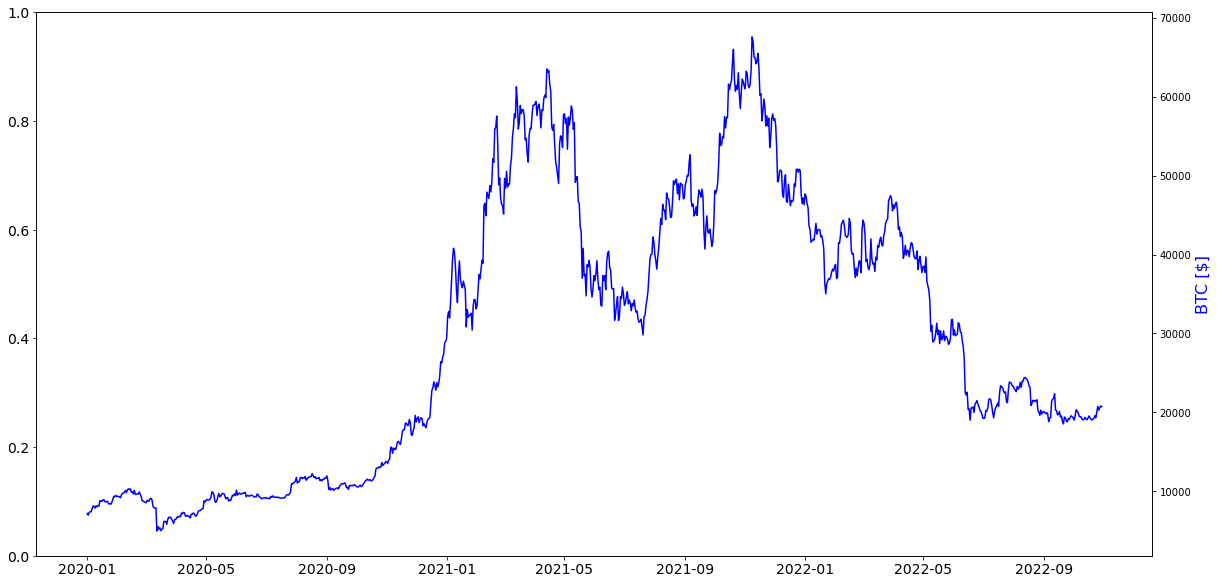

In [24]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax2.plot_date(btc_df['Date'], btc_df["Close"], 'b-')
ax2.set_ylabel(f"BTC [$]", color='b', fontsize=16)

In [30]:
btc_df["Normalize"] = btc_df['Close'] / max(btc_df['Close'].max(), abs(btc_df['Close'].min()))
btc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Normalize
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,0.106564
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,0.103386
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0.108705
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,0.109679
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,0.109689


Text(0, 0.5, 'BTC normalized')

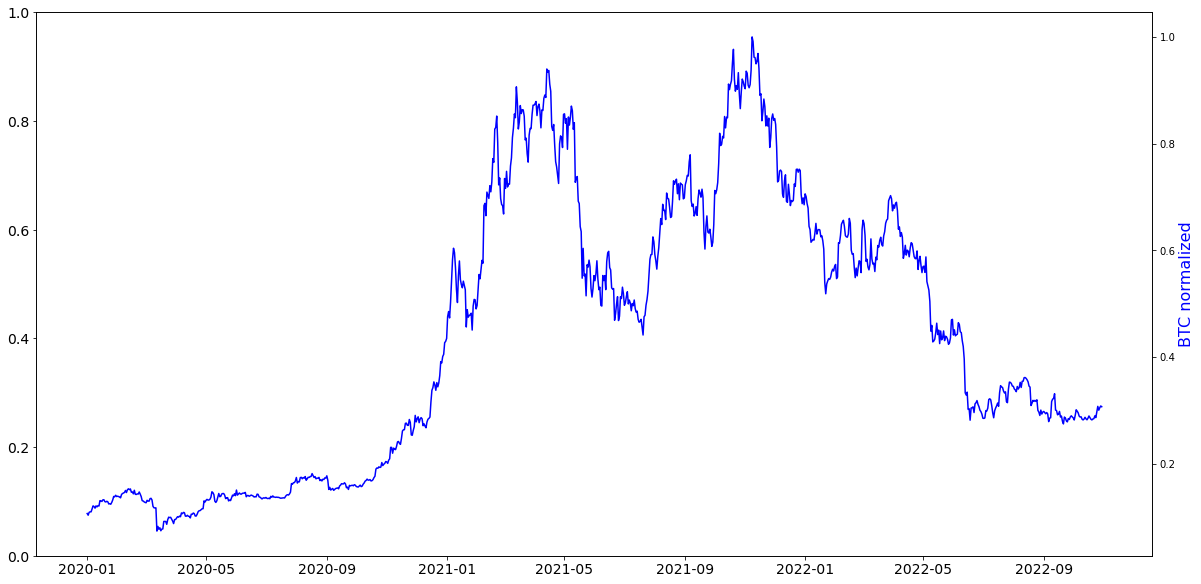

In [29]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax2.plot_date(btc_df['Date'], btc_df["Normalize"], 'b-')
ax2.set_ylabel(f"BTC normalized", color='b', fontsize=16)

In [45]:
btc_df['Normalize'] = btc_df['Normalize'].astype(float)
btc_df['Derivative'] = np.gradient(btc_df['Normalize'])
btc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Normalize,Derivative
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,0.106564,-0.003178
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,0.103386,0.001071
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0.108705,0.003146
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,0.109679,0.000492
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,0.109689,0.002653


Text(0, 0.5, 'BTC [$]')

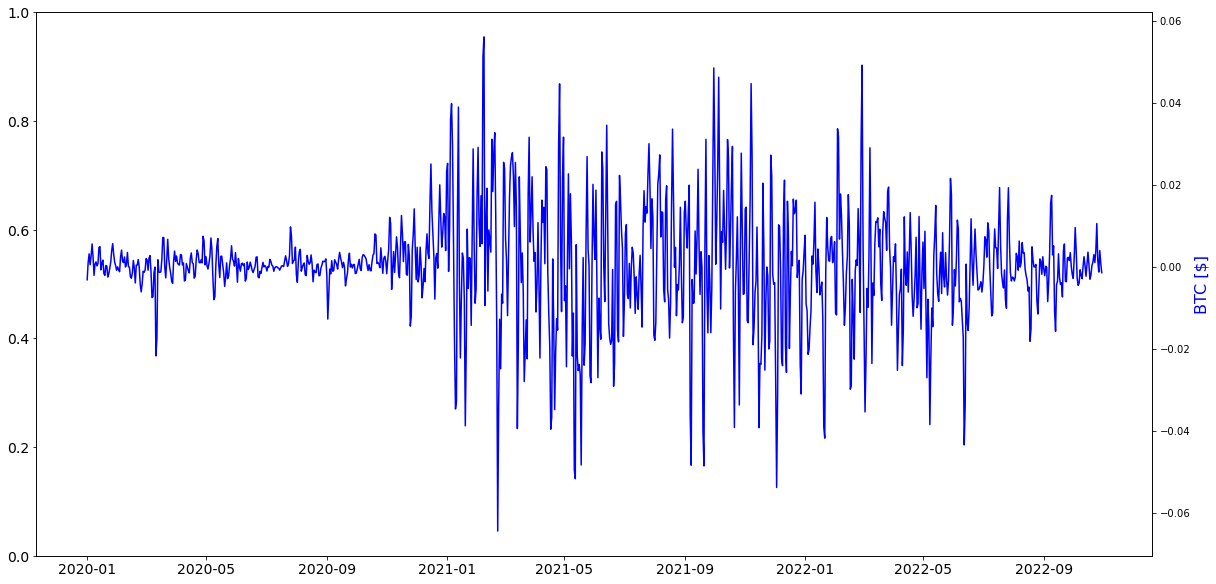

In [46]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax2.plot_date(btc_df['Date'], btc_df["Derivative"], 'b-')
ax2.set_ylabel(f"BTC [$]", color='b', fontsize=16)